In [75]:
import networkx as nx
import numpy as np
import pandas as pd

### Generation of a weighed graph

In [76]:
def generate_random_weighted_graph(n,low,high):
    g = nx.generators.complete_graph(n)
    g.add_weighted_edges_from([(a,b,np.random.randint(low,high)) for a,b in g.edges()])
    return g

In [77]:
np.random.seed(3)
g = generate_random_weighted_graph(7,1,20)

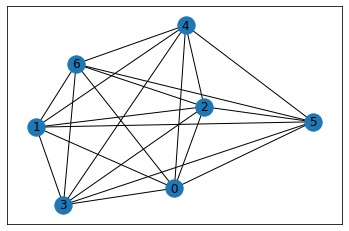

In [98]:
nx.draw_networkx(g)

### Nearest neighbour initialization

In [78]:
def nni(g,close_tour=False):
    curr_node = np.random.choice(g)
    path = [curr_node]
    not_visited = set(g.nodes)-{curr_node} #1,2,4,5
    while not_visited:
        not_visited_neighbours = not_visited & set(g.neighbors(curr_node)) #1,2,3,4,5
        key = lambda x: g[curr_node][x]['weight']
        curr_node = min(not_visited_neighbours,key=key)
        path.append(curr_node)
        not_visited.remove(curr_node)
    if close_tour:
        path.append(path[0])
    return path

In [79]:
parent_1 = nni(g)
parent_2 = nni(g)

### Partially matched crossover

In [33]:
def partially_matched_crossover(p1,p2):
    pt = np.random.randint(1,len(p1)-1) # crossover point
    c1 = p1[:pt] + p2[pt:]
    c2 = p2[:pt] + p1[pt:]
    m1=set(p1)-set(c1)
    m2=set(p2)-set(c2)
    
    if m1 or m2:
        c1=pd.Series(c1)
        c1[c1.duplicated()]=list(m1)
        c2=pd.Series(c2)
        c2[c2.duplicated()]=list(m2)
        c1=c1.to_list()
        c2=c2.to_list()
        
    return c1,c2

In [34]:
partially_matched_crossover(parent_1,parent_2)

([0, 4, 1, 5, 2, 6, 3], [5, 1, 3, 0, 4, 2, 6])

### Inversion mutation

In [61]:
def inversion_mutation(p):
    start = np.random.randint(0,len(p)-1)
    end = np.random.randint(start+1,len(p)+1)
    subtour = p[start:end]
    c = p.copy()
    for i in range(start,end):
        c[i] = subtour.pop()
    return c

In [62]:
inversion_mutation(parent_1)

[0, 4, 3, 5, 1, 2]

### Insertion mutation

In [80]:
def insertion_mutation(p):
    i = np.random.randint(1,len(p))
    k = np.random.randint(0,len(p)-1)
    c = p.copy()
    c.insert(k,c.pop(i))
    return c

In [81]:
insertion_mutation(parent_1)

[5, 4, 0, 1, 2, 6, 3]